#  Analysis comparishion of classified methods based on dataset of films and assessment of the significance of variables on the sympathy of viewers.

Description of the project:
    Based on dataset of about 45000 movies with metadata collected from TMDB, I’ll try to answear 
the question  what makes the movies success among viewers. 
In my notebook, I’ll present analysis comparishion of classified methods which identify what kind of films reach high scores and which the low one. Afterward I'll reveal what determines of the liking of the films among viewers. 

In [33]:
# Importing packages

import numpy as np
import pandas as pd
import re
import ast
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import tree
# import graphviz 

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import TransformerMixin
from sklearn.ensemble import VotingClassifier
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import  metrics
from sklearn.metrics import accuracy_score, confusion_matrix,make_scorer,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV,KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_selection import VarianceThreshold, SelectFromModel,RFE,RFECV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
np.warnings.filterwarnings('ignore')
from xgboost import plot_importance

In [34]:
f = pd.read_csv('../Pobrane/the-movies-dataset/movies_metadata.csv')

In [35]:
f.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [36]:
# We have 24 columns. 
f.shape

(45466, 24)

In [37]:
f.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

# Checking types of variables and % of nulls: 

In [38]:
summary = pd.DataFrame(f.dtypes, columns=['Dtype'])
summary['Nulls'] = pd.DataFrame(f.isnull().any())
summary['Sum_of_nulls'] = pd.DataFrame(f.isnull().sum())
summary['Per_of_nulls'] = round((f.apply(pd.isnull).mean()*100),2)
summary.Dtype = summary.Dtype.astype(str)
print(summary)

                         Dtype  Nulls  Sum_of_nulls  Per_of_nulls
adult                   object  False             0          0.00
belongs_to_collection   object   True         40972         90.12
budget                  object  False             0          0.00
genres                  object  False             0          0.00
homepage                object   True         37684         82.88
id                      object  False             0          0.00
imdb_id                 object   True            17          0.04
original_language       object   True            11          0.02
original_title          object  False             0          0.00
overview                object   True           954          2.10
popularity              object   True             5          0.01
poster_path             object   True           386          0.85
production_companies    object   True             3          0.01
production_countries    object   True             3          0.01
release_da

In [39]:
f.select_dtypes(exclude = ['float', 'int']).describe()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video
count,45466,4494,45466,45466,7782,45466,45449,45455,45466,44512,45461,45080,45463,45463,45379,45460,45379,20412,45460,45460
unique,5,1698,1226,4069,7673,45436,45417,92,43373,44307,44176,45024,22708,2393,17336,1931,6,20283,42277,2
top,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,141971,0,en,Alice in Wonderland,No overview found.,0.0,/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,False
freq,45454,29,36573,5000,12,3,3,32269,8,133,34,5,11875,17851,136,22395,45014,7,11,45367


# Preper the data for analysis

# 1.Cleaning 

In the beginning, I'll check each variable and decide which of them are relevent. 

These id columns should be dropped: 
    id,
    imdb_id; 

The following columns have more than 55% nulls so they also should be deleted:
    belongs_to_collection, 
    homepage,
    taglile,

Now let's take a look for the following features:
    adult,
    overview,
    poster_path,
    status,
    video,
    original_title.    

In [40]:
f.adult.value_counts()   
# We see that we have only 9 adult movies, so  adult feature doesn't tell us a lot and should be deleted. 

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [41]:
f.poster_path.head()   
# there is the URL of the poster image, so I drop it. 

0    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1    /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2    /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3    /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4    /e64sOI48hQXyru7naBFyssKFxVd.jpg
Name: poster_path, dtype: object

In [42]:
f[f['original_title'] != f['title']][['title', 'original_title']].head()
# Original title is title of the movie in the native language, so we can drop it. 

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [43]:
f['status'].value_counts()
# The majority od the films have already been released, so we can drop it. 

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [44]:
f.video.value_counts()
#Video has 2 category. There is less than 1% of film which has video, so I'll drop this value. 

False    45367
True        93
Name: video, dtype: int64

In [45]:
f.overview.head()   
# Overview is a short description the movie, so it also can be dropped. 

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

# 2. Data transformation

In [46]:
f.budget.value_counts()  

0            36573
5000000        286
10000000       259
20000000       243
2000000        242
15000000       226
3000000        223
25000000       206
1000000        197
30000000       190
4000000        181
6000000        174
12000000       172
40000000       167
8000000        155
500000         142
35000000       141
7000000        137
50000000       124
1500000        120
60000000       110
18000000       105
3500000        103
2500000        100
13000000        89
9000000         87
11000000        83
14000000        76
16000000        75
17000000        71
             ...  
996519           1
2135161          1
218              1
4490331          1
5510000          1
41000            1
117000000        1
310000           1
12902809         1
18700000         1
2361000          1
2745000          1
346500           1
2349352          1
3537415          1
1089360          1
51237            1
530000           1
1730000          1
10750000         1
139000000        1
722083      

In [47]:
f['budget'] = pd.to_numeric(f['budget'], errors='coerce')
f['budget'] = f['budget'].replace(0, np.nan)

# Budget - I change this variable into numeric and replace 0 value into Nan. 

In [48]:
f.revenue.describe()

count    4.546000e+04
mean     1.120935e+07
std      6.433225e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [49]:
# Revenue - I replaced 0 value into Nan.

In [50]:
f['revenue'] = pd.to_numeric(f['revenue'], errors='coerce')
f['revenue'] = f['revenue'].replace(0, np.nan)

In [51]:
f.revenue.head()

0    373554033.0
1    262797249.0
2            NaN
3     81452156.0
4     76578911.0
Name: revenue, dtype: float64

In [52]:
f.budget.describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [53]:
f.revenue.describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [54]:
# Based on revenue and budget features I'll calculate the profit of the film. 

f['profit'] = f['revenue'] - f['budget']
f.profit.head()

0    343554033.0
1    197797249.0
2            NaN
3     65452156.0
4            NaN
Name: profit, dtype: float64

In [55]:
f.popularity.describe()

count     45461
unique    44176
top         0.0
freq         34
Name: popularity, dtype: object

In [56]:
# Popularity - I change this variable into numeric. 
f['popularity'] = pd.to_numeric(f['popularity'], errors='coerce')

In [57]:
pd.isnull(f['popularity']).sum() > 0

True

In [58]:
f.popularity.describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [59]:
# Nan will be replaced by median 
f['popularity'] = f['popularity'].fillna(f['popularity'].median())

In [60]:
pd.isnull(f['popularity']).sum() > 0

False

In [62]:
#Vote_average, Vote_count 

In [63]:
f.vote_average.value_counts()

0.0    2998
6.0    2468
5.0    2001
7.0    1886
6.5    1722
6.3    1603
5.5    1381
5.8    1369
6.4    1350
6.7    1342
6.8    1324
6.1    1281
6.6    1263
6.2    1253
5.9    1196
5.3    1082
5.7    1046
6.9    1037
5.6    1006
7.3    1000
5.4     916
7.1     879
7.5     851
7.2     807
8.0     765
7.4     691
5.2     690
4.0     685
4.8     663
5.1     642
       ... 
3.1      49
2.3      45
8.7      45
2.7      44
2.9      40
8.8      32
2.6      31
1.5      30
8.6      25
2.2      20
2.4      19
9.5      18
9.3      18
2.1      16
1.7      13
1.3      13
0.5      13
1.8       9
1.9       8
8.9       7
1.6       6
1.4       5
9.2       4
1.2       4
9.1       3
9.4       3
9.8       1
0.7       1
9.6       1
1.1       1
Name: vote_average, dtype: int64

In [64]:
f['vote_average'] = f['vote_average'].replace(0, np.nan)
# I replaced 0 value into Nan.

In [65]:
f['vote_average'].describe() 

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

In [244]:
f['vote_average'].median() 

6.1

In [245]:
f['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [67]:
f['vote_count'] = pd.to_numeric(f['vote_count'], errors='coerce')
f['vote_count'] = f['vote_count'].replace(0, np.nan)

# Vote count - I change this variable into numeric and replace 0 value into Nan. 

In [68]:
#Nan will be replaced by median. 
f['vote_count'] = f['vote_count'].fillna(f['vote_count'].median())

In [69]:
f['vote_count'].describe()

count    45466.000000
mean       110.585668
std        491.129715
min          1.000000
25%          4.000000
50%         11.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [70]:
f.original_language.value_counts()  

en       32269
fr        2438
it        1529
ja        1350
de        1080
es         994
ru         826
hi         508
ko         444
zh         409
sv         384
pt         316
cn         313
fi         297
nl         248
da         225
pl         219
tr         150
cs         130
el         113
no         106
fa         101
hu         100
ta          78
th          76
he          67
sr          63
ro          57
te          45
ar          39
         ...  
kk           3
am           2
ps           2
bo           2
ne           2
af           2
iu           2
mn           2
pa           2
lo           2
uz           1
si           1
eo           1
jv           1
rw           1
82.0         1
tg           1
la           1
cy           1
sm           1
gl           1
zu           1
lb           1
ay           1
68.0         1
104.0        1
mt           1
fy           1
qu           1
hy           1
Name: original_language, dtype: int64

In [71]:
# Majority of the movies in the dataset are English (more than 32000). Thus, I'll split this variable into
# 2 categories: english and non-english.

f.original_language[f.original_language!='en']=1

In [72]:
f.original_language[f.original_language=='en']=0

In [73]:
f['original_language'] = pd.to_numeric(f['original_language'], errors='coerce')

In [74]:
f.original_language.value_counts()

0    32269
1    13197
Name: original_language, dtype: int64

In [75]:
f.production_companies.head(20)

0        [{'name': 'Pixar Animation Studios', 'id': 3}]
1     [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2     [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3     [{'name': 'Twentieth Century Fox Film Corporat...
4     [{'name': 'Sandollar Productions', 'id': 5842}...
5     [{'name': 'Regency Enterprises', 'id': 508}, {...
6     [{'name': 'Paramount Pictures', 'id': 4}, {'na...
7           [{'name': 'Walt Disney Pictures', 'id': 2}]
8     [{'name': 'Universal Pictures', 'id': 33}, {'n...
9     [{'name': 'United Artists', 'id': 60}, {'name'...
10    [{'name': 'Columbia Pictures', 'id': 5}, {'nam...
11    [{'name': 'Columbia Pictures', 'id': 5}, {'nam...
12    [{'name': 'Universal Pictures', 'id': 33}, {'n...
13    [{'name': 'Hollywood Pictures', 'id': 915}, {'...
14    [{'name': 'Le Studio Canal+', 'id': 183}, {'na...
15    [{'name': 'Universal Pictures', 'id': 33}, {'n...
16    [{'name': 'Columbia Pictures Corporation', 'id...
17    [{'name': 'Miramax Films', 'id': 14}, {'na

In [76]:
f['production_companies'] = f['production_companies'].fillna('[]').apply(ast.literal_eval)
f['production_companies'] = f['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# Production companies - converting string into dictionary. 

In [77]:
f['production_companies'].head()

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_companies, dtype: object

In [78]:
f['production_companies'] = f['production_companies'].apply(lambda x: len(x))
# Production companies - I replaced it with the number of production companies to make the movie. 

In [83]:
f['production_companies'].value_counts()

1     16577
0     11881
2      7963
3      4716
4      1948
5       950
6       563
7       314
8       180
9       133
10       67
11       42
12       35
16       21
13       19
14       16
15        9
17        7
19        5
20        5
21        4
18        3
22        3
26        3
25        1
24        1
Name: production_companies, dtype: int64

In [84]:
f['production_countries'].value_counts()

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                                                                                         17851
[]                                                                                                                                                                                                                  6282
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                                                                                    2238
[{'iso_3166_1': 'FR', 'name': 'France'}]                                                                                                                                                                            1654
[{'iso_3166_1': 'JP', 'name': 'Japan'}]                                                                                             

In [85]:
f['production_countries'] = f['production_countries'].fillna('[]').apply(ast.literal_eval)
f['production_countries'] = f['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
# Production countries- converting string into dictionary. 

In [86]:
f['production_countries'] = f['production_countries'].apply(lambda x: len(x))
# Here also I replaced this variable with the number of countries the film was shot. 

In [89]:
f['production_countries'].head()

0    1
1    1
2    1
3    1
4    1
Name: production_countries, dtype: int64

In [90]:
f['genres'].head()

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [91]:
f['genres'] = f['genres'].fillna('[]').apply(ast.literal_eval)
f['genres'] = f['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
# Genres-  converting string into dictionary. 

In [92]:
f['genres'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

In [93]:
f['genres'] = f['genres'].apply(lambda x: len(x))
# I replaced this variable into number of genres.

In [94]:
f['genres'].head()

0    3
1    3
2    2
3    3
4    1
Name: genres, dtype: int64

In [95]:
f['spoken_languages'].value_counts()

[{'iso_639_1': 'en', 'name': 'English'}]                                                                                                                                                                                                               22395
[]                                                                                                                                                                                                                                                      3829
[{'iso_639_1': 'fr', 'name': 'Français'}]                                                                                                                                                                                                               1853
[{'iso_639_1': 'ja', 'name': '日本語'}]                                                                                                                                                                                                             

In [96]:
f['spoken_languages'] = f['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)
## Spoken launuages-  converting string into dictionary. 

In [97]:
f['spoken_languages'].value_counts()
# # I replaced this variable into number of  using languages in the film. 

1     33736
2      5371
0      3835
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
19        1
13        1
12        1
10        1
Name: spoken_languages, dtype: int64

In [98]:
f[['year','month','day']] = f['release_date'].str.split('-', expand=True)
f['year'] = f['year'].str.strip()
# I split release_date into 3 columns - year, month and day.
# I will use only 'year' for analysis. 

In [99]:
year = f['year'].copy()
year.sort(ascending=False)
print(year)

35587      22
26559    2020
44535    2018
38130    2018
33359    2018
38885    2018
30402    2018
42489    2017
44591    2017
42488    2017
44585    2017
44595    2017
42485    2017
42479    2017
44602    2017
44604    2017
44590    2017
44582    2017
44584    2017
44578    2017
44575    2017
42505    2017
42518    2017
44558    2017
43641    2017
44551    2017
42536    2017
42537    2017
42538    2017
42540    2017
         ... 
40082     NaN
40142     NaN
40203     NaN
40740     NaN
40781     NaN
41052     NaN
41069     NaN
41114     NaN
41399     NaN
41718     NaN
42179     NaN
42568     NaN
42573     NaN
42941     NaN
43090     NaN
43377     NaN
43523     NaN
43962     NaN
44014     NaN
44065     NaN
44098     NaN
44296     NaN
44798     NaN
44978     NaN
45070     NaN
45148     NaN
45203     NaN
45338     NaN
45410     NaN
45461     NaN
Name: year, dtype: object


In [100]:
f['year'] = f['year'].replace('NaT', np.nan)

In [101]:
# I will replace impossible date of year (1,12,22,2020) into NaN. 
f['year'] = pd.to_numeric(f['year'], errors='coerce')
f['year'] = f['year'].replace((1,12,22,2020) ,np.nan)
#f['year'] = f['year'].replace(12 ,np.nan)
#f['year'] = f['year'].replace(1 ,np.nan)
#f['year'] = f['year'].replace(0 ,np.nan)

In [102]:
f['year'] = f['year'].fillna(f['year'].median())

In [103]:
f['year'].describe()

count    45466.000000
mean      1991.898825
std         24.034633
min       1874.000000
25%       1978.000000
50%       2001.000000
75%       2010.000000
max       2018.000000
Name: year, dtype: float64

In [104]:
 f['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [105]:
# The runtime of the movie in minutes.Nan will be replaced mean of the runtime. 
f['runtime'] = f['runtime'].astype('float')

In [106]:
# I replace 0 into Nan. 
f['runtime'] = f['runtime'].replace(0, np.nan)

In [107]:
#Nan will be replaced mean of the runtime. 
f['runtime'] = f['runtime'].fillna(f['runtime'].mean())

In [108]:
 f['runtime'].describe()

count    45466.000000
mean        97.488303
std         33.943610
min          1.000000
25%         87.000000
50%         96.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [161]:
# Final checking our file before analysis. 

In [109]:
f.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'profit', 'year', 'month', 'day'],
      dtype='object')

In [110]:
f.shape

(45466, 28)

Now in datafile we have 4 new variables: profit, year, month, day.

I think it's high time to delete irrelevant variables, which I mentioned before: 

    id,
    imdb_id,
    adult,
    overview,
    poster_path,
    status,
    video,
    original_title,
    release date, month, day, 
    belongs_to_collection, 
    homepage,
    taglile,
    title

In [113]:
f = f.drop(['id', 'imdb_id','title', 'adult', 'overview', 'poster_path', 'status', 'video','original_title','release_date', 'month', 'day','belongs_to_collection','homepage','tagline'], axis=1)

In [114]:
f.shape

(45466, 13)

In [115]:
f.columns

Index(['budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'revenue', 'runtime',
       'spoken_languages', 'vote_average', 'vote_count', 'profit', 'year'],
      dtype='object')

In [116]:
summary = pd.DataFrame(f.dtypes, columns=['Dtype'])
summary['Nulls'] = pd.DataFrame(f.isnull().any())
summary['Sum_of_nulls'] = pd.DataFrame(f.isnull().sum())
summary['Per_of_nulls'] = round((f.apply(pd.isnull).mean()*100),2)
summary.Dtype = summary.Dtype.astype(str)
print(summary)

                        Dtype  Nulls  Sum_of_nulls  Per_of_nulls
budget                float64   True         36576         80.45
genres                  int64  False             0          0.00
original_language       int64  False             0          0.00
popularity            float64  False             0          0.00
production_companies    int64  False             0          0.00
production_countries    int64  False             0          0.00
revenue               float64   True         38058         83.71
runtime               float64  False             0          0.00
spoken_languages        int64  False             0          0.00
vote_average          float64   True          3004          6.61
vote_count            float64  False             0          0.00
profit                float64   True         40085         88.16
year                  float64  False             0          0.00


In [117]:
# We have to delete nulls observation from Vote_average before analysis. 

# Despite of the fact that budget, profit and revenue have many nulls , I suppose they can have an impact on model,
# so I'll take them into account in analysis. 

f1 = f[f['vote_average'].notnull() & f['budget'].notnull() & f['revenue'].notnull()]

In [118]:
# Checking if there are Nans in the datafile. 
np.isnan(f.any())

budget                  False
genres                  False
original_language       False
popularity              False
production_companies    False
production_countries    False
revenue                 False
runtime                 False
spoken_languages        False
vote_average            False
vote_count              False
profit                  False
year                    False
dtype: bool

In [119]:
# Checking if there are infinies in the datafile.
np.isfinite(f.all())

budget                  True
genres                  True
original_language       True
popularity              True
production_companies    True
production_countries    True
revenue                 True
runtime                 True
spoken_languages        True
vote_average            True
vote_count              True
profit                  True
year                    True
dtype: bool

In [120]:
summary = pd.DataFrame(f1.dtypes, columns=['Dtype'])
summary['Nulls'] = pd.DataFrame(f1.isnull().any())
summary['Sum_of_nulls'] = pd.DataFrame(f1.isnull().sum())
summary['Per_of_nulls'] = round((f1.apply(pd.isnull).mean()*100),2)
summary.Dtype = summary.Dtype.astype(str)
print(summary)

                        Dtype  Nulls  Sum_of_nulls  Per_of_nulls
budget                float64  False             0           0.0
genres                  int64  False             0           0.0
original_language       int64  False             0           0.0
popularity            float64  False             0           0.0
production_companies    int64  False             0           0.0
production_countries    int64  False             0           0.0
revenue               float64  False             0           0.0
runtime               float64  False             0           0.0
spoken_languages        int64  False             0           0.0
vote_average          float64  False             0           0.0
vote_count            float64  False             0           0.0
profit                float64  False             0           0.0
year                  float64  False             0           0.0


In [121]:
f1.shape

(5374, 13)

In [122]:
# Before analysis, let't see the relationship between our variables by plotting the Pearson Correlation. 
# look at heatmap.

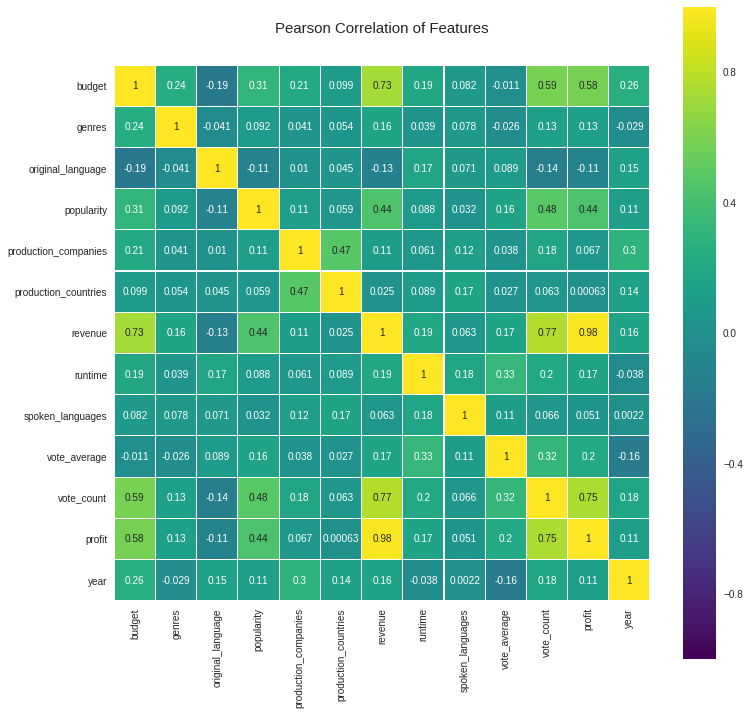

In [123]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(f1.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [124]:
# According to heatmap, there is low correlation between vote_average and the other variables. 

In [125]:
# Now I'll convert vote_average feature into a binary variable: 1 indicating that film gained high scores among viewers
# (above median) and 0 indicating that film gained low scores (below median). 

f1['vote_average'] = f1['vote_average'].apply(lambda x: 1 if x >6.01 else 0)

In [126]:
f1['vote_average'].value_counts()

1    3335
0    2039
Name: vote_average, dtype: int64

# Prepare datafile for classification

In [127]:
X, y = f1.drop('vote_average', axis=1), f1['vote_average']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [129]:
sc = StandardScaler()

In [130]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [131]:
sc.transform(X_train)  
sc.transform(X_test)

array([[ 0.1024736 ,  1.25158045, -0.34605706, ...,  0.46646965,
         0.23140488, -0.18439598],
       [-0.15150427, -0.52913242, -0.34605706, ..., -0.54397731,
        -0.22564296,  0.70396722],
       [-0.07531091,  1.25158045, -0.34605706, ...,  0.1184181 ,
        -0.25187202,  0.89433076],
       ..., 
       [-0.51469263, -0.52913242, -0.34605706, ..., -0.5800367 ,
        -0.49895449, -0.37475953],
       [-0.63660201,  0.36122401,  2.88969687, ..., -0.5753333 ,
        -0.33528249,  0.89433076],
       [ 0.61042934, -1.41948886, -0.34605706, ...,  0.31596087,
         0.27527148,  0.6405127 ]])

# Classification comparision

In [171]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier()]

# Logging for Visual Comparison:

log_cols=["Classifier", "Accuracy","Roc_auc_score"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("-"*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)

    print("Accuracy: {:.2%}".format(acc))

    train_predictions = clf.predict_proba(X_test)[:,1] 
    roc = roc_auc_score(y_test, train_predictions)
    
    print("roc_auc_score: {:.2%}".format(roc))
    
    log_entry = pd.DataFrame([[name, acc*100, roc*100]], columns=log_cols)
    
    log = log.append(log_entry)
    
print("="*30)

------------------------------
KNeighborsClassifier
****Results****
Accuracy: 60.12%
roc_auc_score: 58.08%
------------------------------
SVC
****Results****
Accuracy: 63.91%
roc_auc_score: 49.94%
------------------------------
DecisionTreeClassifier
****Results****
Accuracy: 65.03%
roc_auc_score: 63.31%
------------------------------
RandomForestClassifier
****Results****
Accuracy: 71.43%
roc_auc_score: 78.21%
------------------------------
AdaBoostClassifier
****Results****
Accuracy: 73.81%
roc_auc_score: 80.57%
------------------------------
GaussianNB
****Results****
Accuracy: 45.61%
roc_auc_score: 58.75%
------------------------------
LinearDiscriminantAnalysis
****Results****
Accuracy: 73.81%
roc_auc_score: 78.16%
------------------------------
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 56.40%
roc_auc_score: 75.59%
------------------------------
XGBClassifier
****Results****
Accuracy: 75.60%
roc_auc_score: 83.06%


In [ ]:
# As we see, the best classified method is XGBClassifier with accuracy score 75,60% and roc auc score 83%. 

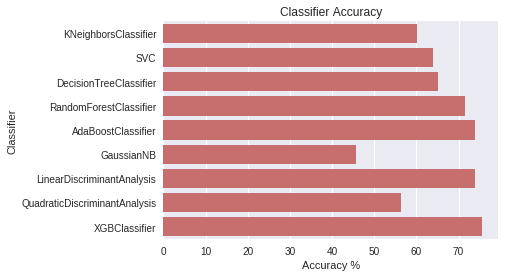

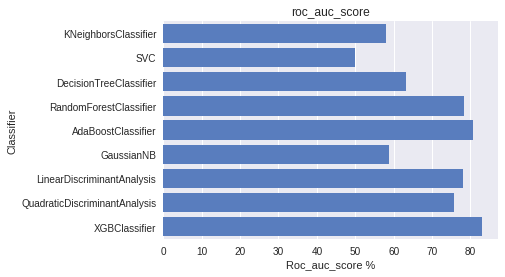

In [172]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Roc_auc_score', y='Classifier', data=log, color="b")

plt.xlabel('Roc_auc_score %')
plt.title('roc_auc_score')
plt.show()

# XGBClassifier

In [148]:
estimator1 = XGBClassifier()
scores = cross_val_score(X=X_train, y=y_train, estimator=estimator1, cv=KFold(8))

In [149]:
estimator1.fit(X=X_train, y=y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [150]:
accuracy_score(estimator1.predict(X_test), y_test)

0.75595238095238093

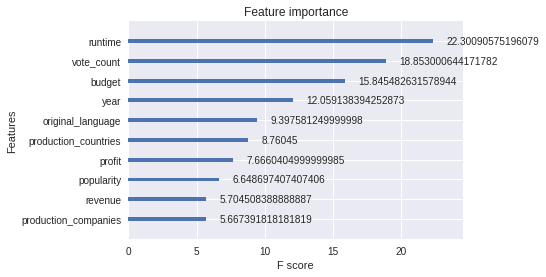

In [151]:
plot_importance(booster=estimator1, max_num_features=10, importance_type='gain')
plt.show()

In [193]:
# The most important features for model are: runtime, vote_count, budget, year. 